In [109]:
import pandas as pd

#Import data from file
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [110]:
data.shape

(316200, 6)

In [111]:
lookuptable_country = {'UK':1, 'US':2, 'China':3, 'Germany':4}
lookuptable_source = {'Ads':1, 'Seo':2, 'Direct':3, }

data['ctry']= data['country'].map(lambda x: lookuptable_country[x])
data['src']= data['country'].map(lambda x: lookuptable_country[x])
data.head()

,country,age,new_user,source,total_pages_visited,converted,ctry,src
0,UK,25,1,Ads,1,0,1,1
1,US,23,1,Seo,5,0,2,2
2,US,28,1,Seo,4,0,2,2
3,China,39,1,Seo,5,0,3,3
4,US,30,1,Seo,6,0,2,2


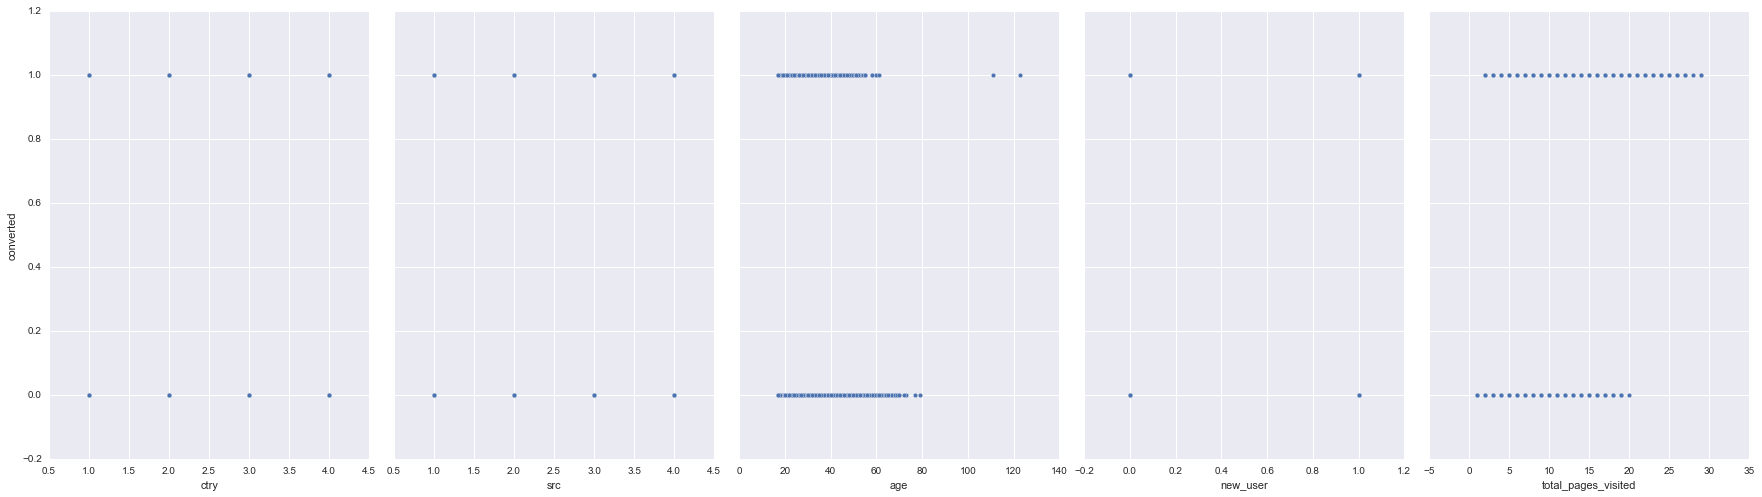

In [112]:
import seaborn as sns

#allow plots to appear inline
%matplotlib inline

sns.pairplot(data,x_vars=['ctry','src','age','new_user','total_pages_visited'],y_vars='converted',size=7, aspect =0.7)

In [113]:
print(sorted(data.country.unique()))
print(sorted(data.source.unique()))

['China', 'Germany', 'UK', 'US']
['Ads', 'Direct', 'Seo']


In [114]:
data['country'] = data.country.astype('category')
data['source'] = data.source.astype('category')

In [115]:
data.head()

,country,age,new_user,source,total_pages_visited,converted,ctry,src
0,UK,25,1,Ads,1,0,1,1
1,US,23,1,Seo,5,0,2,2
2,US,28,1,Seo,4,0,2,2
3,China,39,1,Seo,5,0,3,3
4,US,30,1,Seo,6,0,2,2


In [116]:
#sns.pairplot(data,x_vars=['country','source','age','new_user','total_pages_visited'],y_vars='converted',size=7, aspect =0.7)

#Define X, the input matrix with input features
feature_cols = ['ctry', 'age', 'new_user','src','total_pages_visited']
feature_cols2 = ['age', 'total_pages_visited']

X = data[feature_cols]
print(X.head())

#define y, the response vector
y = data.converted
print(y.head())

   age  total_pages_visited
0   25                    1
1   23                    5
2   28                    4
3   39                    5
4   30                    6
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64


In [117]:
#Split into training and test sets
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(237150, 2)
(79050, 2)
(237150,)
(79050,)


In [118]:
#Build a logistic regression model and make predictions. import,instatiate, and fit

from sklearn.linear_model import LogisticRegression #import
model = LogisticRegression() #instatiate
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
#make prediction
y_pred = model.predict(X_test)

In [120]:
#Evaluation

import numpy as np
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred,)# pos_label=2)
roc_auc = auc(fpr,tpr)

In [121]:
print(fpr, tpr, thresholds, roc_auc)


[ 0.          0.00437908  1.        ] [ 0.          0.61764706  1.        ] [2 1 0] 0.806633986928


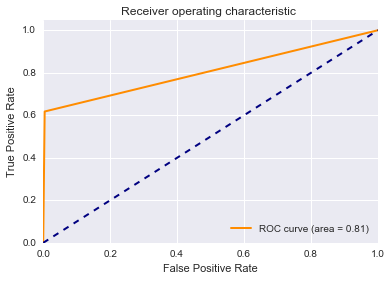

In [122]:
#plot roc curve

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #plot the random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()

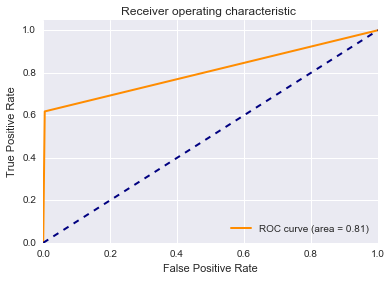

In [127]:
'''
In this section i play around with the features
'''

feature_cols2 = ['ctry','total_pages_visited']
X = data[feature_cols2]
y = data.converted

#Split into training and test sets
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,random_state = 1)

#Build a logistic regression model and make predictions. import,instatiate, and fit

from sklearn.linear_model import LogisticRegression #import
model = LogisticRegression() #instatiate
model.fit(X_train,y_train)

#make prediction
y_pred = model.predict(X_test)

#Evaluation
import numpy as np
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred,)# pos_label=2)
roc_auc = auc(fpr,tpr)

#plot roc curve

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') #plot the random
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()